In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



data=pd.DataFrame({'A':[100,257,300,410,500,122,200,456,237],'B':[10,9,17,15,16,24,11,66,35]})
data

,A,B
0,100,10
1,257,9
2,300,17
3,410,15
4,500,16
5,122,24
6,200,11
7,456,66
8,237,35


In [ ]:
data=data.values
data

array([[100,  10],
       [257,   9],
       [300,  17],
       [410,  15],
       [500,  16],
       [122,  24],
       [200,  11],
       [456,  66],
       [237,  35]])

In [ ]:
X=data[:,0]
Y=data[:,1]

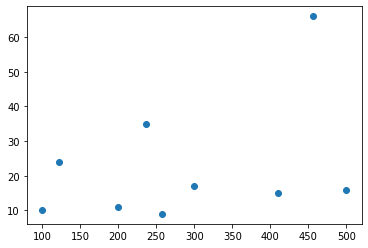

In [ ]:
plt.scatter(X,Y)

In [ ]:
#scale data of 1-D
#you can scale data in StandardScaler() but requirenment is 2-D
Y=Y-Y.mean()
print(Y)

[-12.55555556 -13.55555556  -5.55555556  -7.55555556  -6.55555556
   1.44444444 -11.55555556  43.44444444  12.44444444]


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(1,)),tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

def schedule(epoch,lr):
  if epoch<=5:
    return 0.00001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

r=model.fit(X,Y,epochs=25,callbacks=[scheduler])

Epoch 1/25
1/1 [==============================] - 0s 427ms/step - loss: 88002.2969
Epoch 2/25
1/1 [==============================] - 0s 4ms/step - loss: 89232.8203
Epoch 3/25
1/1 [==============================] - 0s 4ms/step - loss: 55344.0703
Epoch 4/25
1/1 [==============================] - 0s 4ms/step - loss: 86440.0234
Epoch 5/25
1/1 [==============================] - 0s 3ms/step - loss: 32605.9062
Epoch 6/25
1/1 [==============================] - 0s 3ms/step - loss: 80602.8828
Epoch 7/25
1/1 [==============================] - 0s 6ms/step - loss: 17572.9316
Epoch 8/25
1/1 [==============================] - 0s 6ms/step - loss: 696561152.0000
Epoch 9/25
1/1 [==============================] - 0s 4ms/step - loss: 27527569473536.0000
Epoch 10/25
1/1 [==============================] - 0s 3ms/step - loss: 1087868555552096256.0000
Epoch 11/25
1/1 [==============================] - 0s 3ms/step - loss: 42991726834448571826176.0000
Epoch 12/25
1/1 [==============================] - 0s 3ms/st

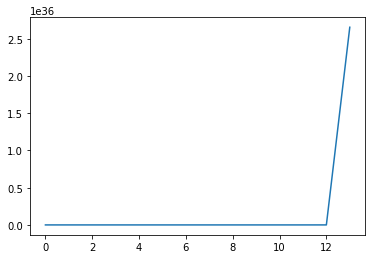

In [ ]:
plt.plot(r.history['loss'],label='loss')

In [ ]:
print(model.layers)

In [ ]:
print(model.layers[0].get_weights())

[array([[nan]], dtype=float32), array([nan], dtype=float32)]


In [ ]:
print(model.layers[0].get_weights()[0][0,0]) #slope of the line is

nan


In [ ]:
#prediction
yhat=model.predict(X).flatten()

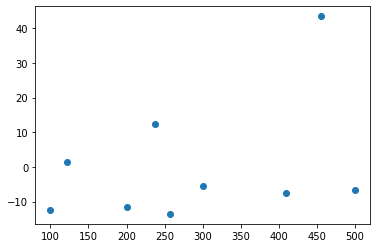

In [ ]:
plt.scatter(X,Y)
plt.sc(X,yhat)

In [ ]:
w,b=model.layers[0].get_weights()
print(w)
print(b)

[[-8.4370886e+27]]
[-2.6430454e+18]


In [ ]:
X=X.reshape(-1,1)
yhat2=(X.dot(w)+b).flatten()
np.allclose(yhat,yhat2)

True

In [ ]:
yhat

array([ 1.5767980e+30,  2.5217520e+29, -1.1061960e+29, -1.0386994e+30,
       -1.7980373e+30,  1.3911821e+30,  7.3308922e+29, -1.4268054e+30,
        4.2091699e+29], dtype=float32)